# Analyze color spaces

I used this notebook to explore some video frames, and see if you I locate clusters of colors that correspond to the sky, trees, specific cars, etc

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Define a function for plotting pixels in 3D

In [2]:

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation




In [59]:
# Read a color image
# cars: 25 31 53
img = cv2.imread("./images/small/31.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
rgb = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
hls = cv2.cvtColor(rgb, cv2.COLOR_RGB2HLS)
luv = cv2.cvtColor(rgb, cv2.COLOR_RGB2LUV)
lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
xyz = cv2.cvtColor(rgb, cv2.COLOR_RGB2XYZ)
yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)

color_spaces_names = ['rgb', 'hsv', 'hls', 'luv', 'lab', 'xyz', 'yuv']
color_spaces = [rgb, hsv, hls, luv, lab, xyz, yuv]


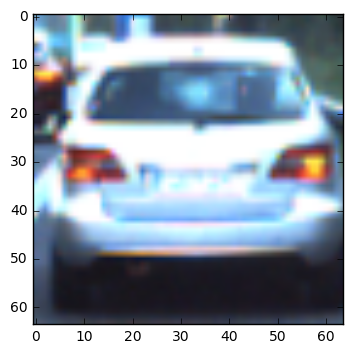

In [60]:
plt.imshow(rgb)
plt.show()

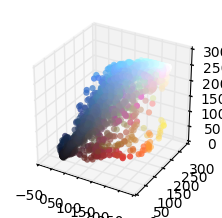

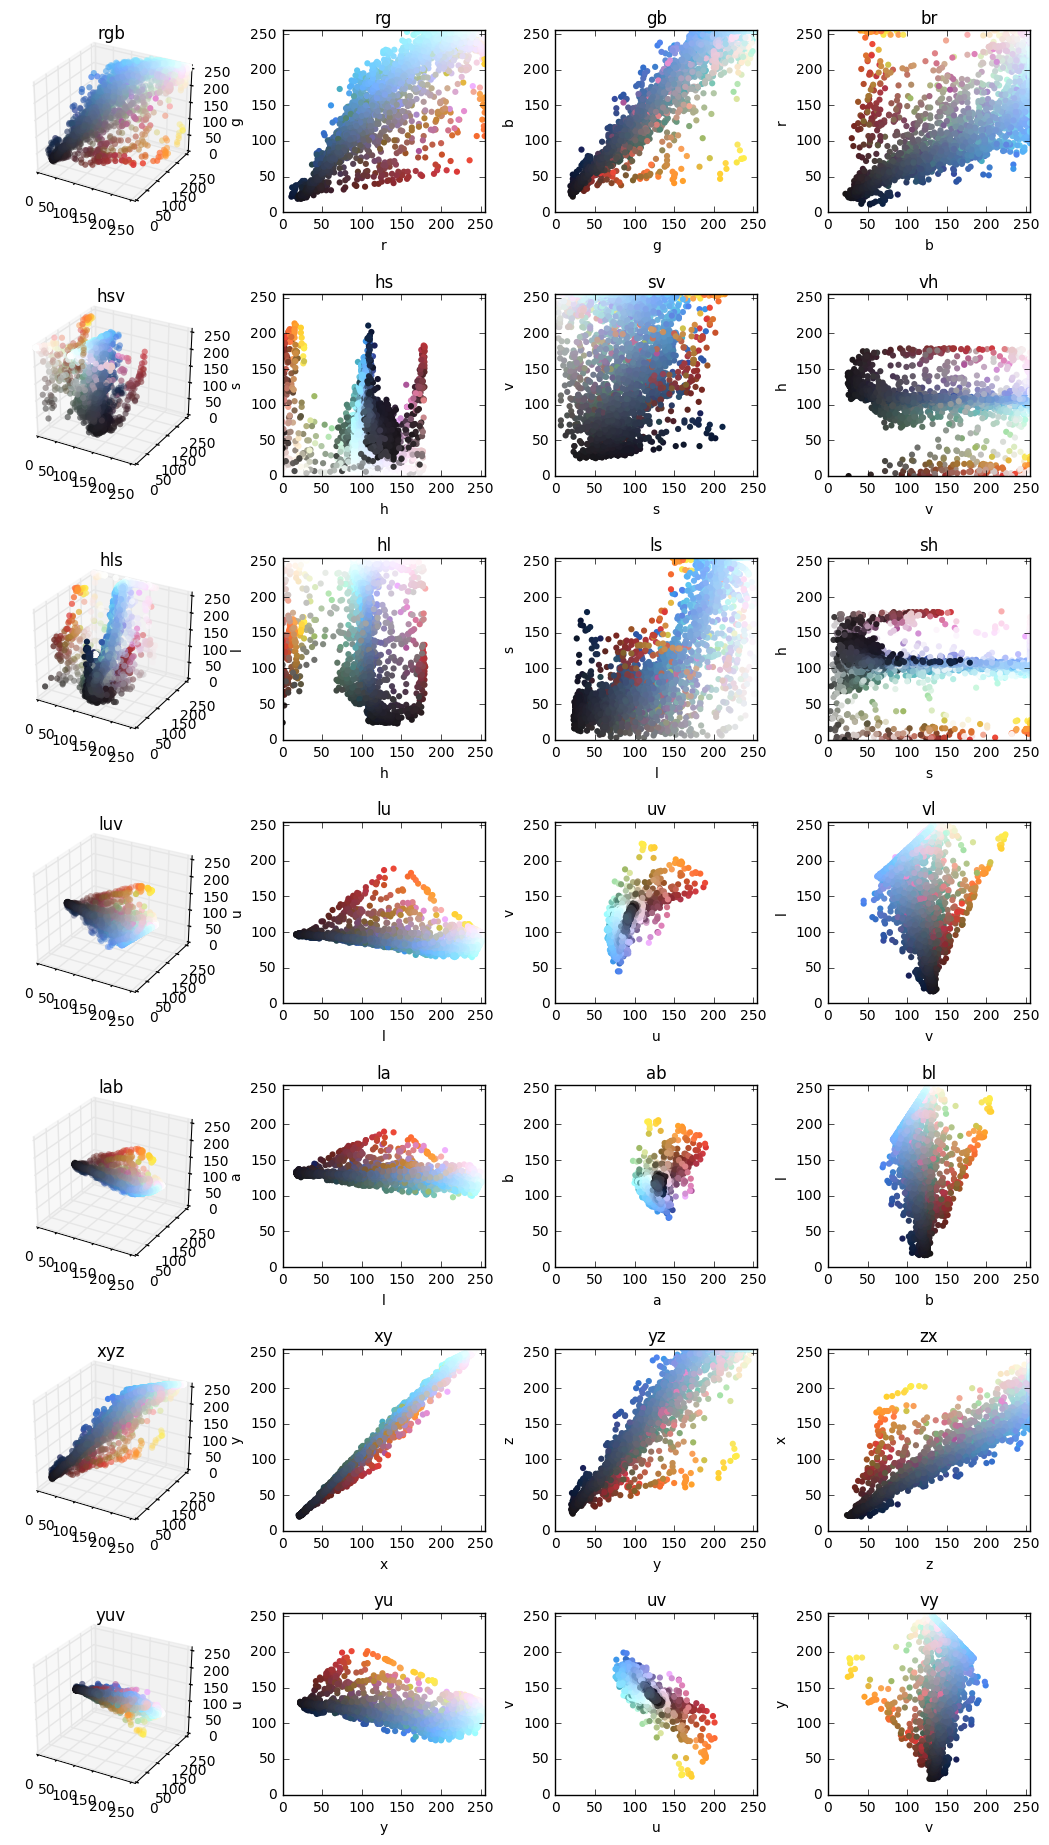

In [67]:
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = rgb / 255.  # scaled to [0, 1], only for plotting

# Plot and show
rows = len(color_spaces)
fig = plt.figure()
fig.set_figheight(rows*3)
fig.set_figwidth(12)

for row, color_space_image in enumerate(color_spaces):
    #These are subplot grid parameters encoded as a single integer. 
    #For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
    
    place = (row*4)+1
    
    ax = fig.add_subplot(rows,4,place, projection='3d')
    ax.scatter(color_space_image[:, :, 0].ravel(),
            color_space_image[:, :, 1].ravel(),
            color_space_image[:, :, 2].ravel(),
            c=img_small_rgb.reshape((-1, 3)), edgecolors='none')
    ax.set_xlim(0,255)
    ax.set_ylim(0,255)
    ax.set_zlim(0,255)
    plt.title(color_spaces_names[row])
    
    for ch in range(3):
        place = place +1
        ax = fig.add_subplot(rows,4,place)
        
        first_channel=ch
        second_channel = (ch+1)%3
        
        ax.scatter(color_space_image[:, :, first_channel].ravel(),
            color_space_image[:, :, second_channel].ravel(),
            c=img_small_rgb.reshape((-1, 3)), edgecolors='none')
        title_subplot =  color_spaces_names[row][first_channel]+ color_spaces_names[row][second_channel]
        plt.axis([0, 255, 0, 255])
        plt.xlabel(color_spaces_names[row][first_channel])
        plt.ylabel(color_spaces_names[row][second_channel])
        plt.title(title_subplot)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)
plt.show()